<a href="https://colab.research.google.com/github/ridho237/image-processing/blob/main/Pengolahan_Citra_M7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Python Packages

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#2. Membuka Gambar

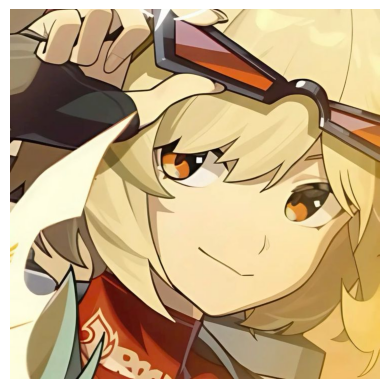

In [26]:
img = Image.open('/content/burnice.jpg')
img.show()

plt.imshow(img)
plt.axis('off')
plt.show()

# 2. Membuat Fungsi untuk Menyisipkan pesan kedalam Gambar

In [ ]:
def encode_message(image, message):
    # Konversi pesan menjadi biner
    binary_message = ''.join([format(ord(char), '08b') for char in message])
    binary_message += '00000000'  # Tambahkan penanda akhir pesan (8 bit nol)

    # Ubah gambar ke array NumPy
    img_array = np.array(image)
    h, w = img_array.shape
    flat_img_array = img_array.flatten()

    if len(binary_message) > len(flat_img_array):
        raise ValueError("Pesan terlalu panjang untuk disisipkan ke dalam gambar ini!")

    # Sisipkan pesan ke bit paling tidak signifikan
    for i in range(len(binary_message)):
        flat_img_array[i] = (flat_img_array[i] & ~1) | int(binary_message[i])

    # Kembalikan array ke bentuk aslinya
    encoded_img_array = flat_img_array.reshape(h, w)
    return Image.fromarray(encoded_img_array)


#3. Membuat Fungsi untuk Membaca pesan kedalam Gambar

In [ ]:
def decode_message(encoded_image):
    # Ubah gambar ke array NumPy
    img_array = np.array(encoded_image)
    flat_img_array = img_array.flatten()

    # Ambil bit paling tidak signifikan untuk setiap pixel
    binary_message = ''.join([str(pixel & 1) for pixel in flat_img_array])

    # Konversi biner ke string hingga menemukan penanda akhir pesan
    message = []
    for i in range(0, len(binary_message), 8):
        byte = binary_message[i:i+8]
        if byte == '00000000':  # Penanda akhir pesan
            break
        message.append(chr(int(byte, 2)))
    return ''.join(message)


#4. Menyisipkan Pesan

In [ ]:
# Buka gambar
img = Image.open('/content/burnice.jpg').convert('L')

# Pesan yang akan disisipkan
message = "Halo, namaku burnice white!"

# Sisipkan pesan ke dalam gambar
encoded_img = encode_message(img, message)

# Simpan gambar hasil encoding
encoded_img.save('/content/Burnice_encoded.png')
print("Gambar dengan pesan tersimpan sebagai 'Burnice_encoded.png'.")


Gambar dengan pesan tersimpan sebagai 'Burnice_encoded.png'.


#5. Membaca Isi Pesan

In [ ]:
# Buka gambar hasil encoding
encoded_img = Image.open('/content/Burnice_encoded.png').convert('L')

# Dekode pesan
decoded_message = decode_message(encoded_img)
print("Pesan tersembunyi:", decoded_message)


Pesan tersembunyi: Halo, namaku burnice white!
